<a href="https://colab.research.google.com/github/jungmin0710/K-digital-PythonDeepLearning/blob/main/CNN_Dogs_and_Cats_Mount_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이미지 데이터 셋을 이용한 CNN Modeling
Google Drive Mount - Dogs and Cats Image_Data
* Train_Data : 2000(1000_Dogs, 1000_Cats) 
* Valid_Data : 1000(500_Dogs, 500_Cats) 
* Test_Data : 1000(500_Dogs, 500_Cats)

In [1]:
import warnings 
warnings.filterwarnings('ignore')

## 0.Import Tensor
* import TensorFlow

In [2]:
import tensorflow as tf 

tf.__version__

'2.4.1'

* GPU 설정 확인

In [3]:
print('GPU Information -', tf.test.gpu_device_name(), '\n') 

!nvidia-smi

GPU Information - /device:GPU:0 

Tue Mar 23 02:15:05 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P0    32W /  70W |    222MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                      

* import Keras

In [4]:
import keras 

keras.__version__

'2.4.3'

## 1.Google Drive Mount
* 'dogs_and_cats_small.zip' 디렉토리를 구글드라이브에 업로드

In [5]:
from google.colab import drive 

drive.mount('/content/drive')

Mounted at /content/drive


* 마운트 결과 확인

In [6]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip'

-rw------- 1 root root 90618980 Mar  4 04:51 '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip'


## 2.Data Preprocessing

### 1)Unzip 'dogs_and_cats_small.zip'

In [7]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/dogs_and_cats_small.zip

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip
  inflating: test/cats/cat.1501.jpg  
  inflating: test/cats/cat.1502.jpg  
  inflating: test/cats/cat.1503.jpg  
  inflating: test/cats/cat.1504.jpg  
  inflating: test/cats/cat.1505.jpg  
  inflating: test/cats/cat.1506.jpg  
  inflating: test/cats/cat.1507.jpg  
  inflating: test/cats/cat.1508.jpg  
  inflating: test/cats/cat.1509.jpg  
  inflating: test/cats/cat.1510.jpg  
  inflating: test/cats/cat.1511.jpg  
  inflating: test/cats/cat.1512.jpg  
  inflating: test/cats/cat.1513.jpg  
  inflating: test/cats/cat.1514.jpg  
  inflating: test/cats/cat.1515.jpg  
  inflating: test/cats/cat.1516.jpg  
  inflating: test/cats/cat.1517.jpg  
  inflating: test/cats/cat.1518.jpg  
  inflating: test/cats/cat.1519.jpg  
  inflating: test/cats/cat.1520.jpg  
  inflating: test/cats/cat.1521.jpg  
  inflating: test/cats/cat.1522.jpg  
  inflating: test/cats/cat.1523.jpg  
  inflating: test/cats/cat.1524.jpg  
  inf

### 2)2) Image_File Directory Setting
* train_dir 
* valid_dir 
* test_dir

In [8]:
train_dir = 'train' 
valid_dir = 'validation' 
test_dir = 'test'

### 3)ImageDataGenerator( ) & flow_from_directory()
* Normalization
  * ImageDataGenerator( )
* Resizing & Generator 
  * flow_from_directory()

In [9]:
from keras.preprocessing.image import ImageDataGenerator

#normalization
train_datagen = ImageDataGenerator(rescale = 1./255) 
valid_datagen = ImageDataGenerator(rescale = 1./255)

#resizing
train_generator = train_datagen.flow_from_directory( 
    train_dir,
    target_size = (150, 150), 
    batch_size = 20, 
    class_mode = 'binary')

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size = (150, 150), 
    batch_size = 20, 
    class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### 4)Test train_generator

In [10]:
for data_batch, labels_batch in train_generator: 
  print('배치 데이터 크기:', data_batch.shape) 
  print('배치 레이블 크기:', labels_batch.shape)
  break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


## 3.CNN Keras Modeling

### 1)Model Define
* Feature Extraction & Classification

In [11]:
from keras import layers 
from keras import models

#CNN
model = models.Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3))) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(64, (3, 3), activation = 'relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation = 'relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation = 'relu')) 
model.add(layers.MaxPooling2D((2, 2)))

#DNN
model.add(layers.Flatten()) 
model.add(layers.Dense(512, activation = 'relu')) 
model.add(layers.Dense(1, activation = 'sigmoid'))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

### 2)Model Compile
* 모델 학습방법 설정

In [12]:
model.compile(loss = 'binary_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

### 3)Model Fit
* 모델 학습 수행 
  * 약 10분

In [13]:
%%time
Hist_dandc = model.fit(train_generator, 
                       steps_per_epoch = 100, 
                       epochs = 60,
                       validation_data = valid_generator, 
                       validation_steps = 50)

Epoch 1/60
100/100 [==============================] - 42s 93ms/step - loss: 0.7209 - accuracy: 0.4865 - val_loss: 0.6919 - val_accuracy: 0.5000
Epoch 2/60
100/100 [==============================] - 9s 89ms/step - loss: 0.6914 - accuracy: 0.5438 - val_loss: 0.6698 - val_accuracy: 0.5450
Epoch 3/60
100/100 [==============================] - 9s 89ms/step - loss: 0.6802 - accuracy: 0.5605 - val_loss: 0.6426 - val_accuracy: 0.6600
Epoch 4/60
100/100 [==============================] - 9s 90ms/step - loss: 0.6313 - accuracy: 0.6488 - val_loss: 0.6327 - val_accuracy: 0.6230
Epoch 5/60
100/100 [==============================] - 9s 91ms/step - loss: 0.5864 - accuracy: 0.6943 - val_loss: 0.6626 - val_accuracy: 0.6460
Epoch 6/60
100/100 [==============================] - 9s 89ms/step - loss: 0.5654 - accuracy: 0.6989 - val_loss: 0.5901 - val_accuracy: 0.6760
Epoch 7/60
100/100 [==============================] - 9s 89ms/step - loss: 0.5147 - accuracy: 0.7275 - val_loss: 0.6120 - val_accuracy: 0.693

### 4)학습 결과 시각화
* Loss Visualization

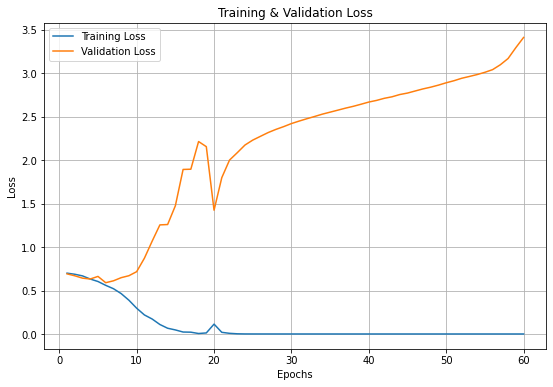

In [15]:
import matplotlib.pyplot as plt 

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (9, 6)) 
plt.plot(epochs, Hist_dandc.history['loss']) 
plt.plot(epochs, Hist_dandc.history['val_loss'])

plt.title('Training & Validation Loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend(['Training Loss', 'Validation Loss']) 
plt.grid() 
plt.show()

* Accuracy Visualization

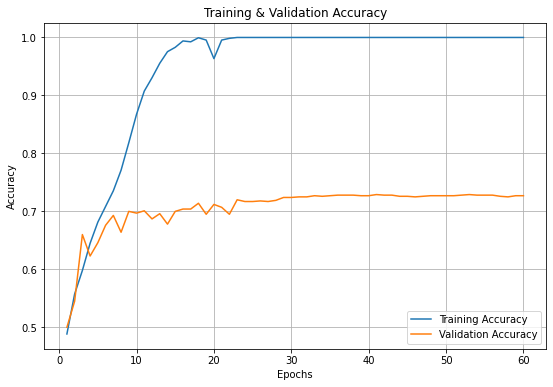

In [16]:
import matplotlib.pyplot as plt 

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (9, 6)) 
plt.plot(epochs, Hist_dandc.history['accuracy']) 
plt.plot(epochs, Hist_dandc.history['val_accuracy'])

plt.title('Training & Validation Accuracy') 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.legend(['Training Accuracy', 'Validation Accuracy']) 
plt.grid() 
plt.show()

### 5)Model Evaluate
* test_generator

In [17]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory( 
    test_dir,
    target_size = (150, 150), 
    batch_size = 20, 
    class_mode = 'binary')

Found 1000 images belonging to 2 classes.


* Loss & Accuracy

In [18]:
loss, accuracy = model.evaluate(test_generator, steps = 50)

print('Loss = {:.5f}'.format(loss)) 
print('Accuracy = {:.5f}'.format(accuracy))

50/50 [==============================] - 3s 53ms/step - loss: 3.6015 - accuracy: 0.7040
Loss = 3.60146
Accuracy = 0.70400


## 4.Model Save & Load to Google Drive

### 1)Google Drive Mount

In [19]:
from google.colab import drive 

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2)Model Save

In [20]:
model.save('/content/drive/My Drive/Colab Notebooks/models/002_dogs_and_cats_small.h5')

!ls -l /content/drive/My\ Drive/Colab\ Notebooks/models

total 40561
-rw------- 1 root root    34592 Mar 17 07:50 001_Model_iris.h5
-rw------- 1 root root 41498896 Mar 23 02:25 002_dogs_and_cats_small.h5


### 3)Model Load

In [22]:
from keras.models import load_model 

model_small = load_model('/content/drive/My Drive/Colab Notebooks/models/002_dogs_and_cats_small.h5')

In [23]:
loss, accuracy = model_small.evaluate(test_generator, steps = 50)

print('Loss = {:.5f}'.format(loss)) 
print('Accuracy = {:.5f}'.format(accuracy))

50/50 [==============================] - 3s 53ms/step - loss: 3.6015 - accuracy: 0.7040
Loss = 3.60146
Accuracy = 0.70400


본 내용은 2021/03/23(화)에 학습한 내용입니다.